## Let's train a W2V model First

In [94]:
import gensim
import gensim.downloader as api
from gensim.models import Word2Vec
from gensim.utils import simple_preprocess
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA


dataset_name = 'text8'  
dataset = api.load(dataset_name)
model = Word2Vec(
    dataset,
    vector_size=100,
    window=5,
    min_count=1,
    workers=4
)

## Let's see what are the closest words to "woman"

In [95]:
word_vectors = model.wv
similar_words = word_vectors.most_similar('woman')
print(similar_words)

[('child', 0.7937976717948914), ('girl', 0.777319073677063), ('man', 0.7511842250823975), ('lady', 0.6824381947517395), ('person', 0.6767551302909851), ('bride', 0.6713410019874573), ('mother', 0.6707326769828796), ('stranger', 0.6681951284408569), ('herself', 0.6653960943222046), ('baby', 0.6568172574043274)]


## Let's load glove

In [96]:
glove_wv = api.load("glove-wiki-gigaword-100")

### Now Analogy evaluation. We define a set of A-B+C and see the difference with D

In [97]:
def visualize_PCA_output(wv,words):
    vecs=wv[words]
    pca = PCA(n_components=2)
    encoded_vecs=pca.fit_transform(vecs)

    x_coords = [vec[0] for vec in encoded_vecs]
    y_coords = [vec[1] for vec in encoded_vecs]
    # Create the plot
    plt.figure(figsize=(5, 5))
    plt.scatter(x_coords, y_coords, marker='o', color='b', alpha=0.5)

    # Add annotations for each word
    for word, x, y in zip(words, x_coords, y_coords):
        plt.annotate(word, xy=(x, y), xytext=(5, 2), textcoords='offset points', ha='right', va='bottom')

    # Set plot title and labels
    plt.title('2D Visualization of Word Vectors')
    plt.xlabel('X')
    plt.ylabel('Y')

    # Show plot
    plt.grid(True)
    plt.show()

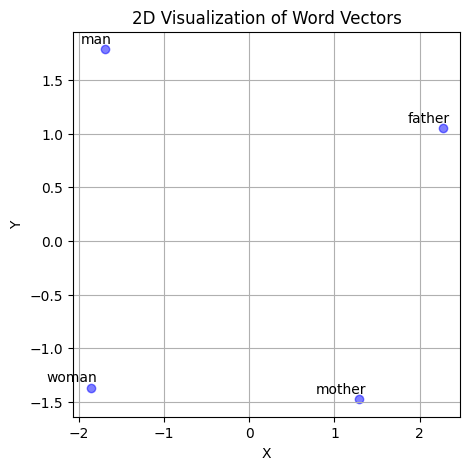

In [98]:
visualize_PCA_output(glove_wv,['man','woman','father','mother'])

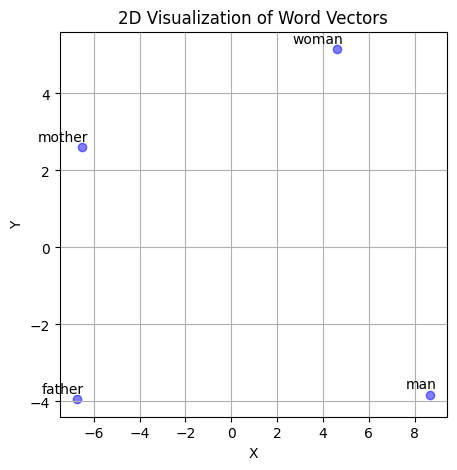

In [99]:
visualize_PCA_output(model.wv,['man','woman','father','mother'])

In [100]:
analogy_set=[['king','man','woman','queen'],
             ['eat', 'ate', 'drink', 'drank'],
             ['airplane','air','car','earth'],
             ['doctor', 'nurse', 'engineer', 'technician'],
             ['sky','blue' , 'grass', 'green'],
             ['cat', 'kitten', 'dog', 'puppy'],]


In [101]:
def evaluate_analogies(model, analogy_set):
    similarities = []
    for analogy in analogy_set:
        word1, word2, word3, word4 = analogy
        expected_word4_vec = model[word4]
        analogy_vector = model[word2] - model[word1] + model[word3]
        similarity = np.dot(analogy_vector, expected_word4_vec) / (np.linalg.norm(analogy_vector) * np.linalg.norm(expected_word4_vec))
        similarities.append(similarity)
    return np.mean(similarities)

# Example usage:
similarities = evaluate_analogies(model.wv, analogy_set)
print("our model Mean Cosine similarities:", similarities)

similarities = evaluate_analogies(glove_wv, analogy_set)
print("Glove Mean Cosine similarities:", similarities)

our model Mean Cosine similarities: 0.31424096
Glove Mean Cosine similarities: 0.5462678
